# Deep Learning with Python
# Tutorial 4.1 - Model Capacity

## Preparing workspace

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
# Setting up `numpy` to read in pickle files
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

## Data Preprocessing

In [34]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for index, sequence in enumerate(sequences):
        results[index, sequence] = 1.
    return results

In [35]:
# Vectorize the training data 
vectorized_training_data = vectorize_sequences(train_data, 10000)

# Vectorize the test data
vectorized_test_data = vectorize_sequences(test_data, 10000)

In [36]:
# Converting training and test labels to numpy arrays of float32
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

In [43]:
# Extracting validation set from training set
num_val_samples = 10000

# Validation set - first 10000 training samples
x_val = vectorized_training_data[:num_val_samples]
y_val = train_labels[:num_val_samples]

# Training set - remaining 15000 samples
partial_x_train = vectorized_training_data[num_val_samples:]
partial_y_train = train_labels[num_val_samples:]

## Model 1 - Original Model

In [53]:
from tensorflow.keras import layers, models

In [70]:
model_original = models.Sequential()
model_original.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model_original.add(layers.Dense(units=16, activation='relu'))
model_original.add(layers.Dense(units=1, activation='sigmoid'))

In [71]:
model_original.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
# Train the model
hist_original = model_original.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
                  validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 396us/sample - loss: 0.5295 - acc: 0.7845 - val_loss: 0.4006 - val_acc: 0.8720
Epoch 2/20
15000/15000 [==============================] - 5s 356us/sample - loss: 0.3185 - acc: 0.9031 - val_loss: 0.3111 - val_acc: 0.8867
Epoch 3/20
15000/15000 [==============================] - 5s 352us/sample - loss: 0.2310 - acc: 0.9270 - val_loss: 0.2934 - val_acc: 0.8836
Epoch 4/20
15000/15000 [==============================] - 5s 345us/sample - loss: 0.1832 - acc: 0.9418 - val_loss: 0.2796 - val_acc: 0.8872
Epoch 5/20
15000/15000 [==============================] - 6s 368us/sample - loss: 0.1489 - acc: 0.9558 - val_loss: 0.2828 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 6s 381us/sample - loss: 0.1247 - acc: 0.9613 - val_loss: 0.2877 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 6s 376us/sample - loss: 0.1033 - acc: 0.9697 - val_l

## Model 2 - Lower Capacity Model
A model with fewer layers or fewer hidden units per layers is said to have a lower learning capacity - there are fewer parameters that it can use to learn an I/O mapping between sanmples and targets.

In [83]:
model_low_capacity = models.Sequential()
model_low_capacity.add(layers.Dense(units=4, activation='relu', input_shape=(10000,)))
model_low_capacity.add(layers.Dense(units=4, activation='relu'))
model_low_capacity.add(layers.Dense(units=1, activation='sigmoid'))

model_low_capacity.compile(optimizer='rmsprop', metrics=['accuracy'], loss='binary_crossentropy')

In [84]:
# Training the model using the same data, epochs, validation set and batch size
hist_lower_capacity = model_low_capacity.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                                            validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 372us/sample - loss: 0.6465 - acc: 0.6485 - val_loss: 0.6089 - val_acc: 0.7934
Epoch 2/20
15000/15000 [==============================] - 5s 326us/sample - loss: 0.5668 - acc: 0.7627 - val_loss: 0.5563 - val_acc: 0.7659
Epoch 3/20
15000/15000 [==============================] - 5s 309us/sample - loss: 0.5143 - acc: 0.8258 - val_loss: 0.5163 - val_acc: 0.8294
Epoch 4/20
15000/15000 [==============================] - 5s 343us/sample - loss: 0.4718 - acc: 0.8679 - val_loss: 0.4973 - val_acc: 0.8141
Epoch 5/20
15000/15000 [==============================] - 5s 313us/sample - loss: 0.4411 - acc: 0.8919 - val_loss: 0.4860 - val_acc: 0.8192
Epoch 6/20
15000/15000 [==============================] - 5s 313us/sample - loss: 0.4174 - acc: 0.9109 - val_loss: 0.4628 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 5s 318us/sample - loss: 0.3980 - acc: 0.9252 - val_l

## Comparing Validation Loss for Both Models

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

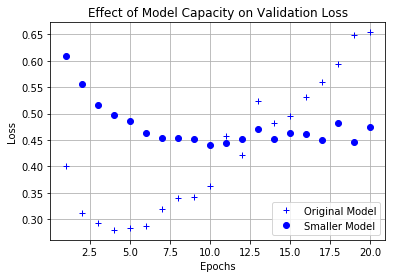

In [87]:
# Extracting data
epochs = range(1, len(hist_original.history['val_loss']) + 1)
val_loss_original = hist_original.history['val_loss']
val_loss_low_capacity = hist_lower_capacity.history['val_loss']

# Plotting values
plt.figure(); plt.plot(epochs, val_loss_original, 'b+', label='Original Model')
plt.plot(epochs, val_loss_low_capacity, 'bo', label='Smaller Model')
plt.grid(True); plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
plt.title('Effect of Model Capacity on Validation Loss')
plt.show()

## Model 3 - Higher Capacity

In [85]:
model_higher_capacity = models.Sequential()
model_higher_capacity.add(layers.Dense(activation='relu', units=512, input_shape=(10000,)))
model_higher_capacity.add(layers.Dense(activation='relu', units=512))
model_higher_capacity.add(layers.Dense(activation='sigmoid', units=1))
model_higher_capacity.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
hist_higher_capacity = model_higher_capacity.fit(partial_x_train, partial_y_train, 
                                                epochs=20, batch_size=512, 
                                                validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 21s 1ms/sample - loss: 0.5377 - acc: 0.7668 - val_loss: 0.3742 - val_acc: 0.8413
Epoch 2/20
15000/15000 [==============================] - 18s 1ms/sample - loss: 0.2563 - acc: 0.8957 - val_loss: 0.3178 - val_acc: 0.8709
Epoch 3/20
15000/15000 [==============================] - 19s 1ms/sample - loss: 0.1622 - acc: 0.9369 - val_loss: 0.3023 - val_acc: 0.8802
Epoch 4/20
15000/15000 [==============================] - 19s 1ms/sample - loss: 0.0634 - acc: 0.9792 - val_loss: 0.4416 - val_acc: 0.8736
Epoch 5/20
15000/15000 [==============================] - 18s 1ms/sample - loss: 0.0865 - acc: 0.9794 - val_loss: 0.3368 - val_acc: 0.8877
Epoch 6/20
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.0042 - acc: 0.9997 - val_loss: 0.4953 - val_acc: 0.8883
Epoch 7/20
15000/15000 [==============================] - 21s 1ms/sample - loss: 3.7796e-04 - acc: 1.0000 - val_loss

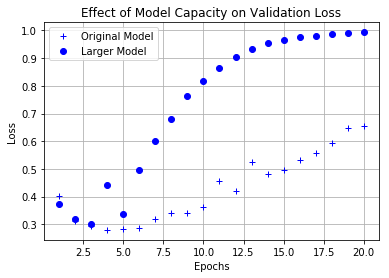

In [90]:
# Extracting data
epochs = range(1, len(hist_original.history['val_loss']) + 1)
val_loss_original = hist_original.history['val_loss']
val_loss_high_capacity = hist_higher_capacity.history['val_loss']

# Plotting values
plt.figure(); plt.plot(epochs, val_loss_original, 'b+', label='Original Model')
plt.plot(epochs, val_loss_high_capacity, 'bo', label='Larger Model')
plt.grid(True); plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
plt.title('Effect of Model Capacity on Validation Loss')
plt.show()

The larger model starts overfitting around 3p epochs while the smaller model starts overfitting around 5 or 6 epochs. Once overfitting begins, the larger model overfits at a greater rate than the original model. 

This shows that having a model with too large a capacity promotes ovefitting because the model has more parameters that it can use to map the training inputs to outputs. The generalization capability for the second model is almost zero - it has the maximum possible validation loss, which shows it's a very poorly generalized/overoptimized model.

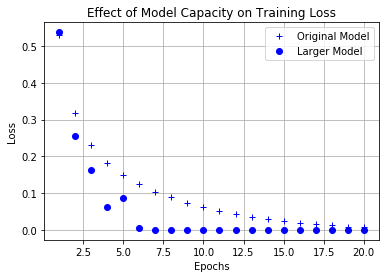

In [92]:
# Also plotting the training loss
# Extracting data
epochs = range(1, len(hist_original.history['loss']) + 1)
train_loss_original = hist_original.history['loss']
train_loss_high_capacity = hist_higher_capacity.history['loss']

# Plotting values
plt.plot(epochs, train_loss_high_capacity, 'bo', label='Larger Model')
plt.grid(True); plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
plt.title('Effect of Model Capacity on Training Loss')
plt.show()

## Weight Regularization
Based on Occam's Razor, a simpler model is more likely to be correct and make accurate predictions than a complex one. A simpler model is one that has lower crossentropy. Concretely, this means
- the model has fewer parameters
    - fewer layers
    - fewer hidden units per layer
- the model has regularized weights

This means the model's weights are distributed more regularly - there is smaller deviation in the value of the weights. Regularization is achieved by attaching a cost to the model's optimizer - the cost is a quantity that the model's optimizer will attempt to minimize while also minimising the loss. 

So weight regularization is an added constraint on models that prevents them from becoming too complex and incentivizes the optimizer to find weight values that satisfy two (often conflicting) requirements
- weight magnitudes should not be too large and should only take small values
- weights should be such that they minimise the loss

The larger the value of the weigths, the larger the cost. 

### Weight Regularization Techniques
- L1 Regularization: Proportional to the absolute value of the weight coefficients.
- L2 Regularization: Proportional to the square of the value of the weight coefficients i.e. the L2 norm of the weights. Also known as weight decay.

## Model 3 - L2 Weight Regularization

In the following model, each parameter/weight will ad 0.001 times its value to the total cost of the network. This penalty is only added at training time, so loss for the network will be much higher at training than at test time.

This is because the training loss is no longer being optimized on its own. It is being optimized with the added constraint of minimizing the cost of having very large weights too. So the weights optimised during training will not be the best possible weights for minimal training loss.

However, because the regularization will have improved the generalizing power of the neural network, this means the loss on the test data will be lower.

In [101]:
from tensorflow.keras import regularizers\

model_L2 = models.Sequential()
model_L2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                         activation='relu', input_shape=(10000,)))
model_L2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                         activation='relu'))
model_L2.add(layers.Dense(1, activation='sigmoid'))

model_L2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
# Train the regularized model
hist_L2 = model_L2.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, 
                      validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 429us/sample - loss: 0.5701 - acc: 0.7924 - val_loss: 0.4505 - val_acc: 0.8685
Epoch 2/20
15000/15000 [==============================] - 5s 340us/sample - loss: 0.3783 - acc: 0.8997 - val_loss: 0.3798 - val_acc: 0.8767
Epoch 3/20
15000/15000 [==============================] - 5s 341us/sample - loss: 0.3007 - acc: 0.9207 - val_loss: 0.3377 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 5s 339us/sample - loss: 0.2601 - acc: 0.9309 - val_loss: 0.3302 - val_acc: 0.8868
Epoch 5/20
15000/15000 [==============================] - 5s 345us/sample - loss: 0.2376 - acc: 0.9393 - val_loss: 0.3387 - val_acc: 0.8839
Epoch 6/20
15000/15000 [==============================] - 5s 341us/sample - loss: 0.2202 - acc: 0.9473 - val_loss: 0.3451 - val_acc: 0.8813
Epoch 7/20
15000/15000 [==============================] - 5s 340us/sample - loss: 0.2082 - acc: 0.9491 - val_l

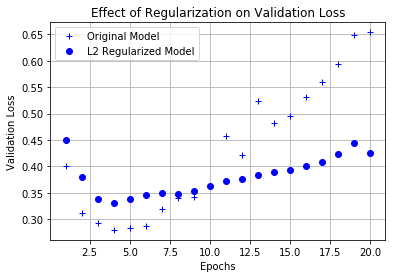

In [105]:
# Plotting the validation loss for the regularized network on the same plot as the original
# Extracting data
epochs = range(1, len(hist_original.history['val_loss']) + 1)
val_loss_original = hist_original.history['val_loss']
val_loss_L2 = hist_L2.history['val_loss']

# Plotting values
plt.figure(); 
plt.plot(epochs, val_loss_original, 'b+', label='Original Model')
plt.plot(epochs, val_loss_L2, 'bo', label='L2 Regularized Model')
plt.xlabel('Epochs'); plt.ylabel('Validation Loss'); plt.grid(True); plt.legend()
plt.title('Effect of Regularization on Validation Loss'); plt.show()

Regularization's effect is evident: the regularized network still overfits, but is much more resistant to overfitting over 20 epochs than the first model. This can be seen by the fact that the even though both models start overfitting around 4 epochs, the regularized model's validation loss increases at a much lower rate than the original model's. This is why at the end of 20 epochs, the regularized model's validation loss is susbtantially lower than the original model's.

## Dropout
Another regularization technique which involves setting the outputs of a random number of activation units in a layer to 0. This adds noise to to the neural network's output during training that helps mitigate the effect of happenstance patterns that aren't significant.

In [107]:
# Create a new model
model_dropout = models.Sequential()
model_dropout.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(16, activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [108]:
# Compiling the model
model_dropout.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [110]:
hist_dropout = model_dropout.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                               validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 430us/sample - loss: 0.6201 - acc: 0.6506 - val_loss: 0.4762 - val_acc: 0.8521
Epoch 2/20
15000/15000 [==============================] - 6s 384us/sample - loss: 0.4736 - acc: 0.7947 - val_loss: 0.3918 - val_acc: 0.8638
Epoch 3/20
15000/15000 [==============================] - 7s 450us/sample - loss: 0.3869 - acc: 0.8457 - val_loss: 0.3223 - val_acc: 0.8802
Epoch 4/20
15000/15000 [==============================] - 5s 352us/sample - loss: 0.3243 - acc: 0.8770 - val_loss: 0.2875 - val_acc: 0.8887
Epoch 5/20
15000/15000 [==============================] - 6s 376us/sample - loss: 0.2814 - acc: 0.9013 - val_loss: 0.2723 - val_acc: 0.8916
Epoch 6/20
15000/15000 [==============================] - 5s 361us/sample - loss: 0.2463 - acc: 0.9143 - val_loss: 0.2787 - val_acc: 0.8894
Epoch 7/20
15000/15000 [==============================] - 6s 401us/sample - loss: 0.2146 - acc: 0.9295 - val_l

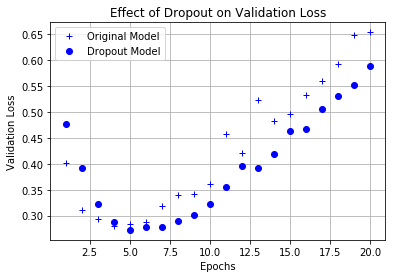

In [111]:
# Plotting the validation loss for the regularized network on the same plot as the original
# Extracting data
epochs = range(1, len(hist_original.history['val_loss']) + 1)
val_loss_original = hist_original.history['val_loss']
val_loss_dropout = hist_dropout.history['val_loss']

# Plotting values
plt.figure(); 
plt.plot(epochs, val_loss_original, 'b+', label='Original Model')
plt.plot(epochs, val_loss_dropout, 'bo', label='Dropout Model')
plt.xlabel('Epochs'); plt.ylabel('Validation Loss'); plt.grid(True); plt.legend()
plt.title('Effect of Dropout on Validation Loss'); plt.show()

Not as marked an effect on overfitting as was observed in the case of L2 regularization, but it is still an improvement. With dropout, the validation loss still follows the trend of the original model, but the validation loss is slightly lower than the original's after overfitting.